In [1]:
import ndlib

In [2]:
import networkx as nx
g = nx.read_edgelist('/Users/Cava/Desktop/University/Data Science & Business Informatics/Social Network Analysis/Project/Network_finale_12_07.csv', data=(('weight',int),('industry',int)), delimiter=",")

In [3]:
import ndlib.models.epidemics as ep

model = ep.SIModel(g)

In [4]:
import json
print(json.dumps(model.parameters, indent=2))

{
  "model": {
    "beta": {
      "descr": "Infection rate",
      "range": "[0,1]",
      "optional": false
    },
    "tp_rate": {
      "descr": "Whether if the infection rate depends on the number of infected neighbors",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 1
    }
  },
  "nodes": {},
  "edges": {}
}


In [5]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [6]:
import ndlib.models.ModelConfig as mc

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01) # infection rate
#cfg.add_model_parameter('gamma', 0.01) # recovery rate

In [7]:
cfg.add_model_parameter("percentage_infected", 0.02)
model.set_initial_status(cfg)

In [8]:
iterations = model.iteration_bunch(500, node_status=True)
iterations

100%|██████████| 500/500 [00:24<00:00, 20.34it/s]


[{'iteration': 0,
  'status': {'PERMASTEELISA': 0,
   'SALINI SPA': 0,
   'YOOX NET-A-PORTER GROUP': 0,
   'SOMEC SPA': 0,
   'RIZZANI DE ECCHER': 0,
   'RAZORFISH HEALTHWARE': 0,
   'TMD FRICTION ESCO GMBH': 0,
   'BENETTON GROUP SPA': 0,
   'BLUE FORM STUDIO SRL': 1,
   'BLUESTEEL SRL': 0,
   'ACCENTURE': 0,
   'FINCANTIERI SPA': 0,
   'H3G': 0,
   'FREELANCE': 0,
   'MAIRE TECNIMONT SPA': 0,
   'ABB': 0,
   'RENCO SPA': 0,
   'COOPERATIVA MURATORI E CEMENTISTI DI RAVENNA': 0,
   'POLITECNICO DI MILANO': 0,
   'GRUPPO GENERALI SPA': 0,
   'ENEL': 0,
   'PWC SPA': 0,
   'ALITALIA SPA': 0,
   'GRUPPO FIAT': 0,
   'SAIPEM SPA': 0,
   'ASTALDI SPA': 0,
   'VALENTINO': 0,
   "UNIVERSITÀ DEGLI STUDI DI ROMA 'LA SAPIENZA'": 0,
   'WIND TRE SPA': 0,
   'UNICREDIT GROUP': 0,
   'TECHINT GROUP': 0,
   "SOCIETÀ ITALIANA PER CONDOTTE D'ACQUA SPA": 0,
   'THALES ALENIA SPACE SPA': 0,
   'WEBUILD': 0,
   'TENOVA': 0,
   'SOILMEC': 0,
   'TOTO SPA': 0,
   'THE LANE CONSTRUCTION CORPORATION': 0,
   

In [9]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14578,
     14565,
     14547,
     14507,
     14455,
     14350,
     14235,
     14101,
     13927,
     13782,
     13616,
     13462,
     13286,
     13113,
     12942,
     12771,
     12593,
     12435,
     12258,
     12096,
     11939,
     11792,
     11639,
     11484,
     11335,
     11196,
     11056,
     10907,
     10755,
     10642,
     10522,
     10388,
     10252,
     10124,
     9999,
     9875,
     9745,
     9637,
     9515,
     9406,
     9304,
     9177,
     9061,
     8964,
     8838,
     8727,
     8636,
     8535,
     8423,
     8319,
     8234,
     8155,
     8065,
     7974,
     7882,
     7788,
     7694,
     7594,
     7497,
     7404,
     7326,
     7235,
     7161,
     7072,
     6994,
     6929,
     6855,
     6785,
     6725,
     6656,
     6599,
     6538,
     6455,
     6375,
     6311,
     6252,
     6185,
     6128,
     6070,
     6010,
     5944,
     5879,
     5827,
     5770,
     5719,
    

In [10]:
import matplotlib
matplotlib.use('Agg')

In [11]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

no display found. Using non-interactive Agg backend


/opt/anaconda3/lib/python3.7/site-packages/ndlib/viz/mpl/DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [12]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

/opt/anaconda3/lib/python3.7/site-packages/ndlib/viz/mpl/DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [13]:
NNODES = g.number_of_nodes()
NNODES

NEDGES = g.number_of_edges()
NEDGES

LMAX = (NNODES * NNODES - 1) / 2

print("Number of Nodes: ", NNODES)
print("Number of Edged: ", NEDGES)
print("LMAX: ", LMAX)

Number of Nodes:  14875
Number of Edged:  43932
LMAX:  110632812.0


In [14]:
er = nx.erdos_renyi_graph(NNODES, p=0.00039, directed = False, seed = 42) 

In [15]:
model = ep.SIModel(er)
cfg.add_model_parameter("percentage_infected", 0.02)
model.set_initial_status(cfg)

In [16]:
iterations = model.iteration_bunch(500, node_status=True)
iterations

100%|██████████| 500/500 [00:20<00:00, 24.88it/s]


[{'iteration': 0,
  'status': {0: 0,
   1: 0,
   2: 0,
   3: 0,
   4: 0,
   5: 0,
   6: 0,
   7: 0,
   8: 0,
   9: 0,
   10: 0,
   11: 0,
   12: 0,
   13: 0,
   14: 0,
   15: 0,
   16: 0,
   17: 0,
   18: 0,
   19: 0,
   20: 0,
   21: 0,
   22: 1,
   23: 0,
   24: 0,
   25: 0,
   26: 0,
   27: 0,
   28: 0,
   29: 0,
   30: 0,
   31: 0,
   32: 0,
   33: 0,
   34: 0,
   35: 0,
   36: 0,
   37: 0,
   38: 0,
   39: 0,
   40: 0,
   41: 0,
   42: 0,
   43: 0,
   44: 0,
   45: 0,
   46: 0,
   47: 0,
   48: 0,
   49: 0,
   50: 0,
   51: 0,
   52: 0,
   53: 0,
   54: 0,
   55: 0,
   56: 0,
   57: 0,
   58: 0,
   59: 0,
   60: 0,
   61: 0,
   62: 0,
   63: 0,
   64: 0,
   65: 0,
   66: 0,
   67: 0,
   68: 0,
   69: 0,
   70: 0,
   71: 0,
   72: 0,
   73: 0,
   74: 0,
   75: 0,
   76: 0,
   77: 0,
   78: 0,
   79: 0,
   80: 0,
   81: 0,
   82: 0,
   83: 0,
   84: 0,
   85: 0,
   86: 0,
   87: 0,
   88: 0,
   89: 0,
   90: 0,
   91: 0,
   92: 0,
   93: 0,
   94: 0,
   95: 0,
   96: 0,
   97: 0,
  

In [17]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14578,
     14560,
     14552,
     14529,
     14510,
     14491,
     14467,
     14450,
     14429,
     14407,
     14378,
     14348,
     14315,
     14286,
     14253,
     14226,
     14195,
     14161,
     14128,
     14095,
     14054,
     14020,
     13979,
     13927,
     13877,
     13834,
     13785,
     13734,
     13687,
     13635,
     13570,
     13506,
     13449,
     13383,
     13319,
     13259,
     13190,
     13118,
     13049,
     12983,
     12902,
     12813,
     12738,
     12627,
     12538,
     12447,
     12348,
     12247,
     12139,
     12031,
     11932,
     11825,
     11700,
     11581,
     11462,
     11352,
     11234,
     11085,
     10943,
     10813,
     10668,
     10529,
     10402,
     10258,
     10104,
     9953,
     9797,
     9640,
     9464,
     9318,
     9176,
     9016,
     8845,
     8685,
     8531,
     8352,
     8195,
     8033,
     7868,
     7721,
     7580,
     7433,
     7

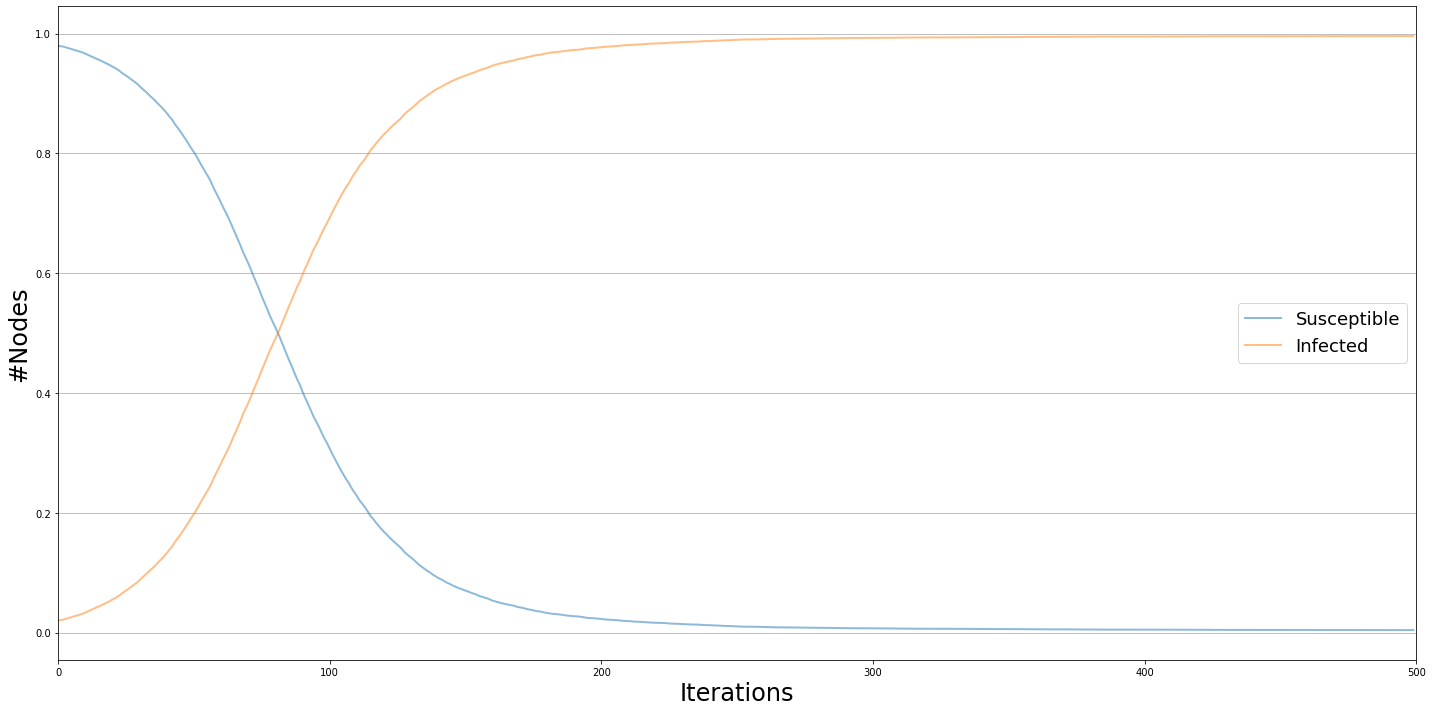

In [18]:
import matplotlib
matplotlib.use('Agg')

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

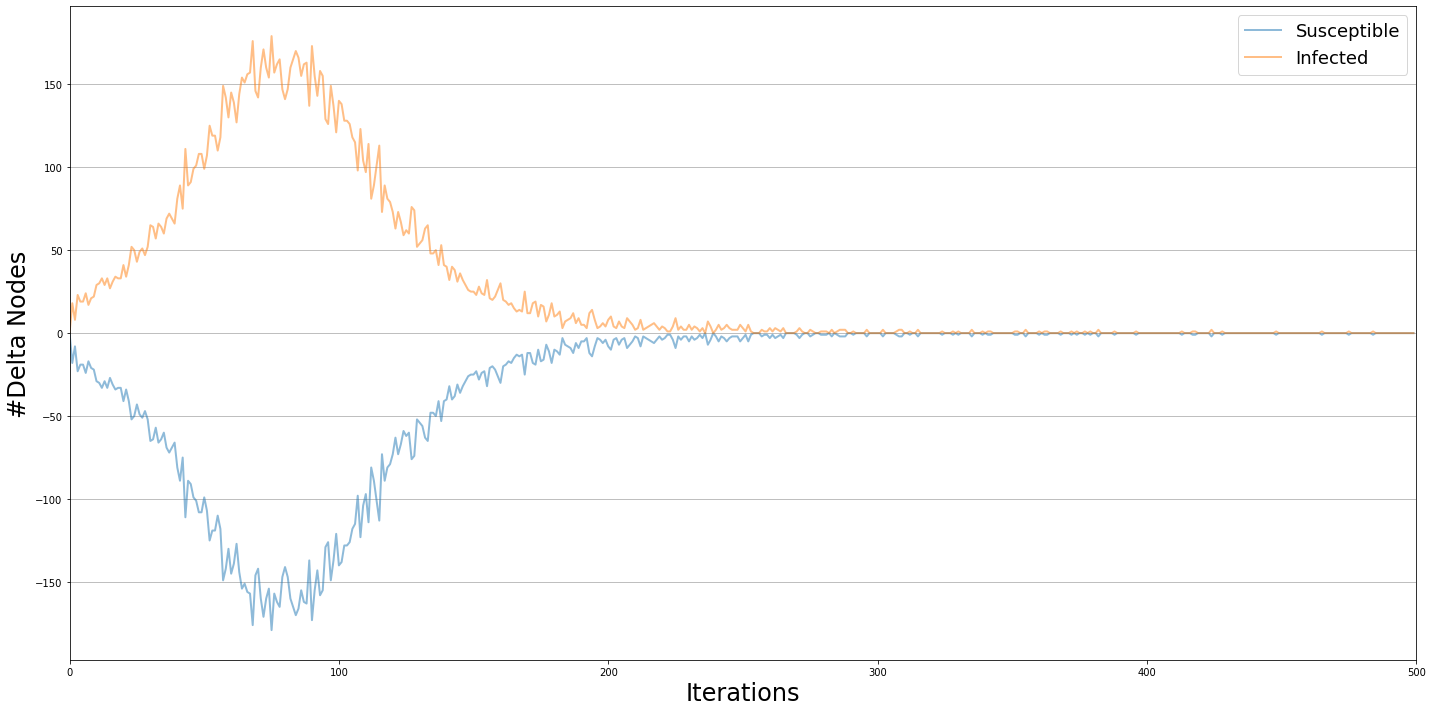

In [19]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

In [20]:
ba = nx.barabasi_albert_graph(NNODES, m=3, seed = 42)

In [21]:
model = ep.SIModel(ba)
cfg.add_model_parameter("percentage_infected", 0.02)
model.set_initial_status(cfg)

In [22]:
iterations = model.iteration_bunch(500, node_status=True)
iterations

100%|██████████| 500/500 [00:19<00:00, 25.59it/s]


[{'iteration': 0,
  'status': {0: 0,
   1: 0,
   2: 0,
   3: 1,
   4: 0,
   5: 0,
   6: 0,
   7: 0,
   8: 0,
   9: 0,
   10: 0,
   11: 0,
   12: 0,
   13: 0,
   14: 0,
   15: 0,
   16: 0,
   17: 0,
   18: 0,
   19: 0,
   20: 0,
   21: 0,
   22: 0,
   23: 0,
   24: 0,
   25: 0,
   26: 0,
   27: 0,
   28: 0,
   29: 0,
   30: 0,
   31: 0,
   32: 0,
   33: 0,
   34: 0,
   35: 0,
   36: 0,
   37: 0,
   38: 0,
   39: 0,
   40: 0,
   41: 0,
   42: 0,
   43: 0,
   44: 0,
   45: 0,
   46: 0,
   47: 0,
   48: 0,
   49: 0,
   50: 0,
   51: 0,
   52: 0,
   53: 0,
   54: 0,
   55: 0,
   56: 0,
   57: 0,
   58: 0,
   59: 0,
   60: 0,
   61: 0,
   62: 0,
   63: 0,
   64: 0,
   65: 0,
   66: 0,
   67: 0,
   68: 0,
   69: 0,
   70: 1,
   71: 0,
   72: 0,
   73: 0,
   74: 0,
   75: 0,
   76: 0,
   77: 0,
   78: 0,
   79: 0,
   80: 0,
   81: 0,
   82: 0,
   83: 0,
   84: 0,
   85: 0,
   86: 0,
   87: 0,
   88: 0,
   89: 0,
   90: 0,
   91: 0,
   92: 0,
   93: 0,
   94: 0,
   95: 0,
   96: 0,
   97: 0,
  

In [23]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14578,
     14549,
     14518,
     14480,
     14441,
     14398,
     14356,
     14308,
     14255,
     14197,
     14119,
     14047,
     13969,
     13898,
     13829,
     13732,
     13629,
     13536,
     13430,
     13321,
     13197,
     13089,
     12966,
     12832,
     12709,
     12564,
     12434,
     12312,
     12165,
     11991,
     11811,
     11626,
     11472,
     11294,
     11110,
     10939,
     10749,
     10581,
     10399,
     10219,
     10018,
     9844,
     9639,
     9439,
     9260,
     9069,
     8857,
     8673,
     8498,
     8298,
     8110,
     7945,
     7740,
     7562,
     7382,
     7206,
     7014,
     6848,
     6687,
     6493,
     6335,
     6177,
     6026,
     5877,
     5711,
     5557,
     5411,
     5242,
     5109,
     4965,
     4831,
     4708,
     4572,
     4452,
     4329,
     4189,
     4066,
     3965,
     3852,
     3746,
     3630,
     3529,
     3422,
     3316,
     321

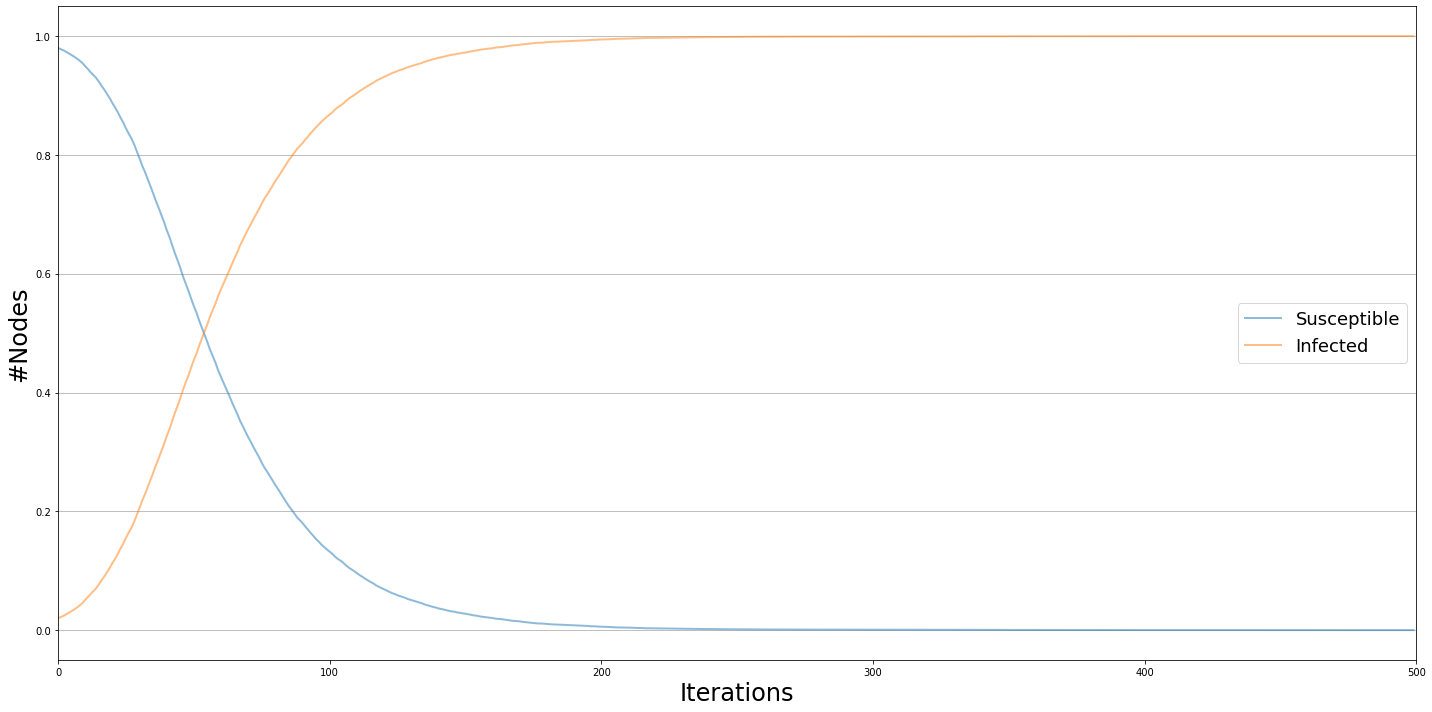

In [24]:
import matplotlib
matplotlib.use('Agg')

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

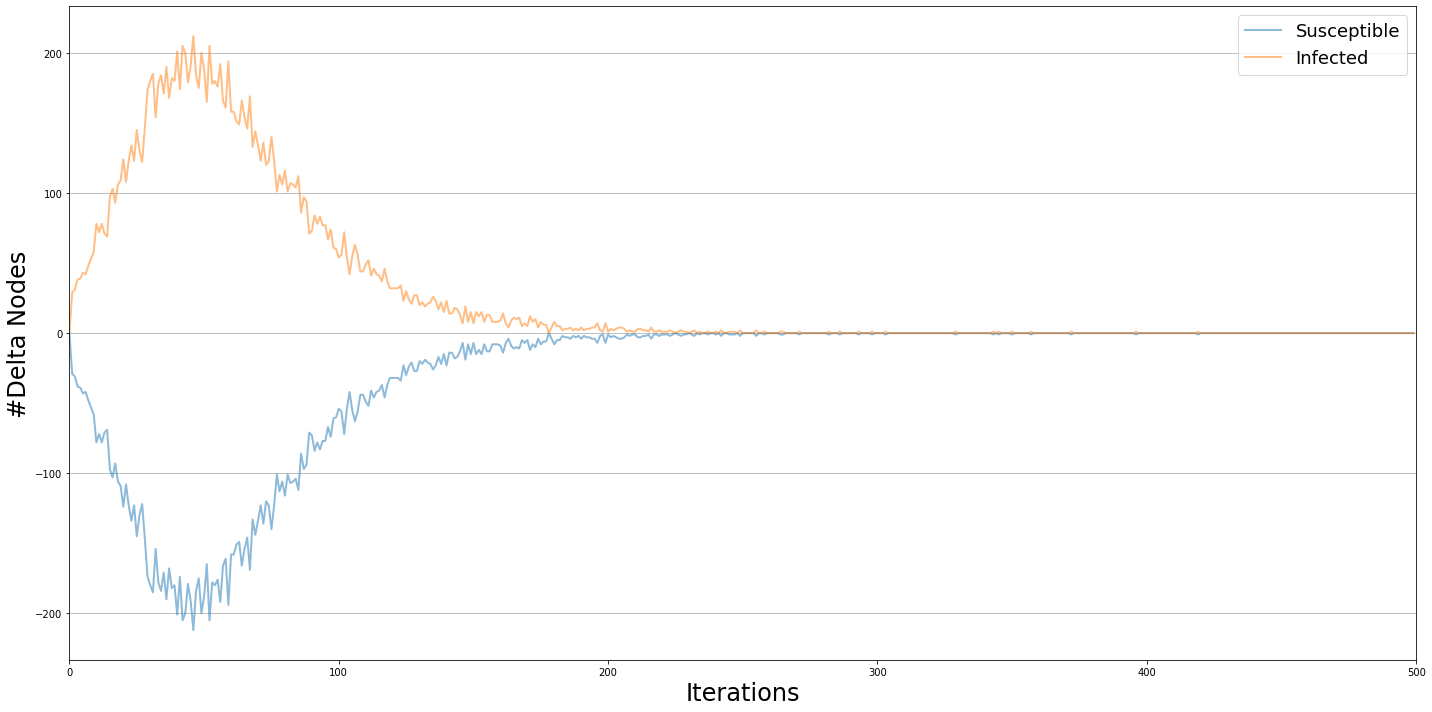

In [25]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

In [26]:
ws = nx.watts_strogatz_graph(NNODES, k=6, p=0.1, seed = 42)

In [27]:
model = ep.ProfileModel(ws)
cfg.add_model_parameter("percentage_infected", 0.02)
model.set_initial_status(cfg)

In [28]:
iterations = model.iteration_bunch(500, node_status=True)
iterations

100%|██████████| 500/500 [00:05<00:00, 85.44it/s]


[{'iteration': 0,
  'status': {0: 0,
   1: 0,
   2: 1,
   3: 0,
   4: 0,
   5: 0,
   6: 0,
   7: 0,
   8: 0,
   9: 0,
   10: 0,
   11: 0,
   12: 0,
   13: 0,
   14: 0,
   15: 0,
   16: 0,
   17: 0,
   18: 0,
   19: 0,
   20: 0,
   21: 0,
   22: 0,
   23: 0,
   24: 0,
   25: 0,
   26: 0,
   27: 0,
   28: 0,
   29: 0,
   30: 0,
   31: 0,
   32: 0,
   33: 0,
   34: 0,
   35: 0,
   36: 0,
   37: 0,
   38: 0,
   39: 0,
   40: 0,
   41: 0,
   42: 0,
   43: 0,
   44: 1,
   45: 0,
   46: 0,
   47: 0,
   48: 0,
   49: 0,
   50: 0,
   51: 0,
   52: 0,
   53: 0,
   54: 0,
   55: 0,
   56: 0,
   57: 0,
   58: 0,
   59: 0,
   60: 0,
   61: 0,
   62: 0,
   63: 0,
   64: 0,
   65: 0,
   66: 0,
   67: 0,
   68: 0,
   69: 0,
   70: 0,
   71: 0,
   72: 0,
   73: 1,
   74: 0,
   75: 0,
   76: 0,
   77: 0,
   78: 0,
   79: 0,
   80: 0,
   81: 0,
   82: 0,
   83: 0,
   84: 0,
   85: 0,
   86: 0,
   87: 0,
   88: 0,
   89: 0,
   90: 0,
   91: 0,
   92: 0,
   93: 0,
   94: 0,
   95: 0,
   96: 0,
   97: 0,
  

In [29]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14578,
     13094,
     10612,
     6479,
     2276,
     457,
     59,
     8,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,


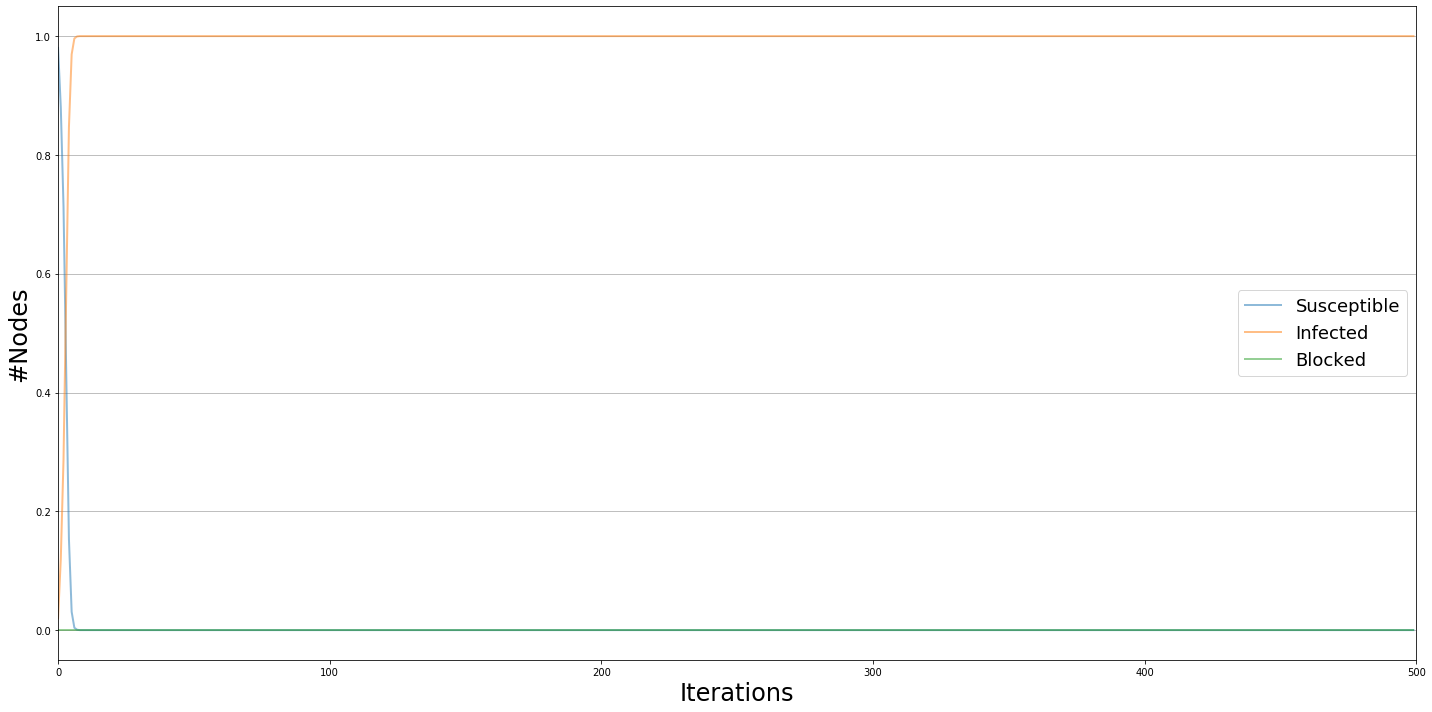

In [30]:
import matplotlib
matplotlib.use('Agg')

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

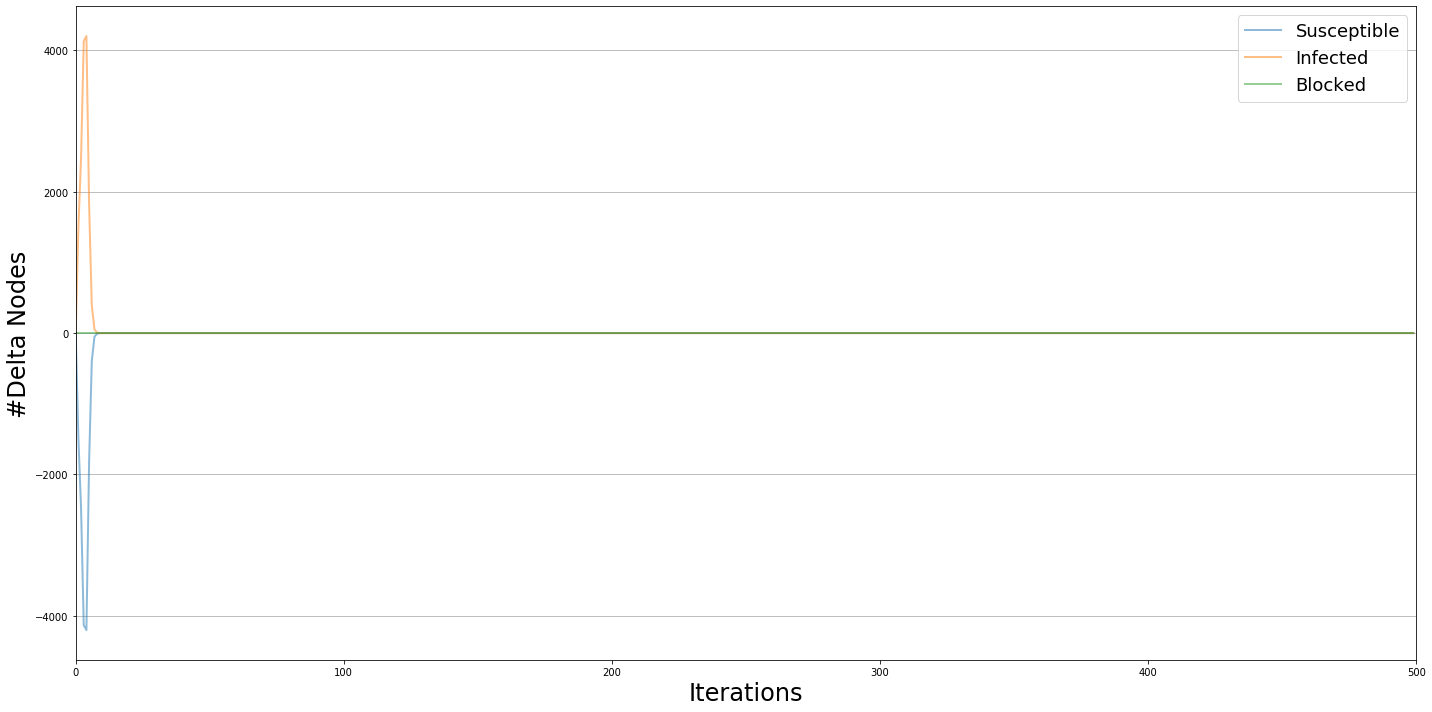

In [31]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()